In [1]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.14")

BiocManager::install(c("GEOquery", "e1071"))
library(GEOquery)
library(e1071)
library(caret)

load ("AML_datasets.RData")

rm (data.2, data.3, info.2, info.3)

un.diseases <- unique(info.1$Disease)
un.diseases

str(un.diseases)

aml.ind <- which (info.1$Disease == "AML")

non.aml.ind <- which(info.1$Disease != "AML")

aml.prognosis <- rep(0, length(info.1$Disease))
aml.prognosis[aml.ind] <- 1

set.seed(234)
data.inds <- 1:2500
shuffled.inds <- sample(data.inds)
shuffled.inds[1:20]

fold1.ind <- shuffled.inds[1:500]
fold2.ind <- shuffled.inds[501:1000]
fold3.ind <- shuffled.inds[1001:1500]
fold4.ind <- shuffled.inds[1501:2000]
fold5.ind <- shuffled.inds[2001:2500]

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.20), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'arkhe', 'brew', 'broom', 'cachem', 'caret', 'class', 'classInt',
  'cli', 'codetools', 'colorspace', 'conflicted', 'covr', 'credentials',
  'curl', 'data.table', 'dbplyr', 'devtools', 'dplyr', 'DT', 'dtplyr', 'e1071',
  'evaluate', 'expm', 'fansi', 'fastmap', 'FNN', 'fontawesome', 'forcats',
  'forecast', 'fracdiff', 'fs', 'future', 'gargle', 'gert', 'ggplot2',
  'ggrepel', 'gh', 'git2r', 'gitcreds', 'gower', 'gstat', 'gtools', 'haven',
  'highr', 'htmlwidgets', 'httpuv', 'httr', 'IRdisplay', 'IRkernel', 'isoband',

[1] ALL                                     
 [2] CLL                                     
 [3] AML                                     
 [4] CML                                     
 [5] healthy                                 
 [6] MDS                                     
 [7] Infection                               
 [8] AMKL                                    
 [9] DS transient myeloproliferative disorder
[10] Diabetes Type I                         
[11] Diabetes Type II                        
[12] clinically isolated syndrome            
54 Levels: ALL AMKL AML clinically isolated syndrome CLL ... Wegener's Granulomatosis

 Factor w/ 54 levels "ALL","AMKL","AML",..: 1 5 3 6 10 12 11 2 9 7 ...


[1] 2079 1314 1710  290 1298 1976 2244 1334 1343   79  238   43  874 1512 1089
[16]  601  277 1732  493  152

### Fold 1

[1] 12708  2500

[1] 2500    8

[1] 986

[1] 2500

[1] 2449

0%        10%        25%        50%        75%        90%       100% 
-0.7847538 -0.2807955 -0.1964024 -0.0640470  0.1488413  0.3207092  0.7426485

[1] 11378

[1] 10936

[1] 10020

[1] 9456

[1] 9220

[1] 8575

Accuracy of linear SVM model: 407 1143 2853 3017 12146 12390 3098 12269 11334 5604 2544 12624 7634 565 3844 9988 11900 7012 3047 9338 1360 3621 3416 2027 113 5945 3034 2855 11054 2177 1497 4066 305 1578 1522 9239 8029 2614 6606 1413 3733 1856 8517 9129 4806 1488 5530 193 1804 568 389 5277 7587 2835 400 1106 12169 10476 9387 9639 7103 7545 4249 3628 4895 4512 10837 7078 6958 539 9789 2303 3035 1754 1342 11460 7171 5866 3257 11941 3764 9877 302 735 279 2304 5749 1780 10511 9096 283 10774 2123 12643 553 2586 243 5354 399 7055 


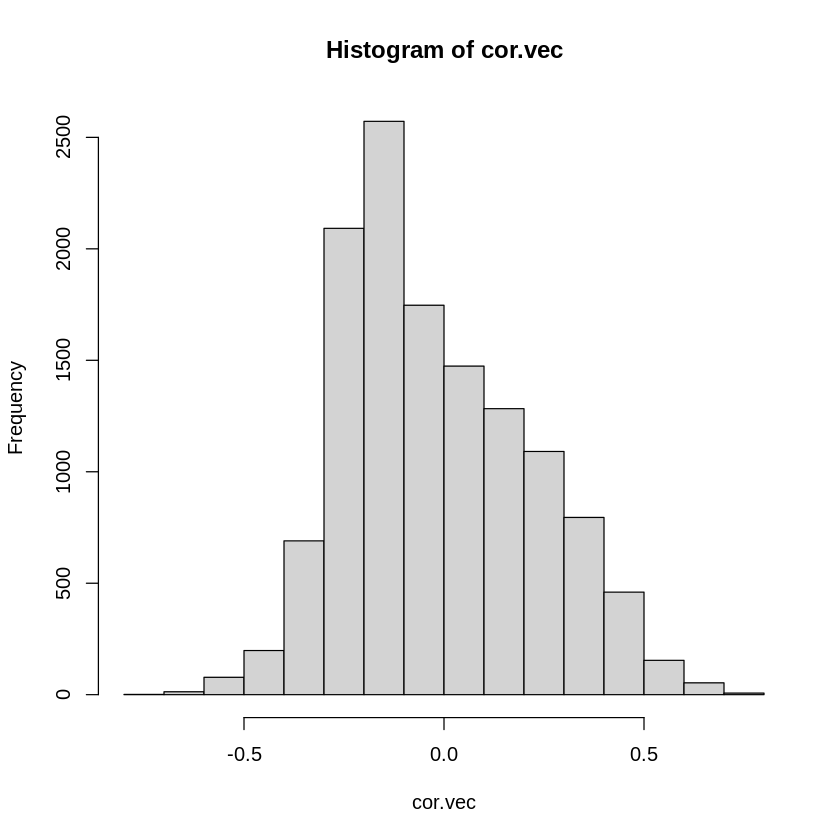

In [2]:
rm.fold <- fold1.ind
my.data <- cbind(data.1[,-rm.fold],data.1[,rm.fold])
dim(my.data)
my.info <- rbind(info.1[-rm.fold,],info.1[rm.fold,])
dim(my.info)

aml.prognosis <- rep(0, length(my.info$Disease))
aml.prognosis[which (my.info$Disease == "AML")] <- 1
sum(aml.prognosis)
length(aml.prognosis)

### Feature Selection with Correlation, Fold 1

cor.vec <- apply (my.data[,1:2000], 1, function (x){cor(x, aml.prognosis[1:2000])})
hist (cor.vec)

gene.ind <- c(which(cor.vec > 0.3), which(cor.vec < -0.3))
length (gene.ind) # just to see how many genes get selected

quantile (cor.vec, probs=c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 1))


### Feature Selection with T-test, Fold 1

zero.ind <- which(aml.prognosis[1:2000] == 0)
one.ind <- which(aml.prognosis[1:2000] == 1)
ttest.vec <- apply (my.data, 1, function (x){(t.test(x[one.ind] , x[zero.ind]))$p.value})

sum (ttest.vec < 0.05)
sum (ttest.vec < 0.01)
sum (ttest.vec < 0.0001)
adj.ttest.vec <- p.adjust (ttest.vec, method="bonferroni")
sum (adj.ttest.vec < 0.05)
sum (adj.ttest.vec < 0.01)
sum (adj.ttest.vec < 0.0001)

ret.order <- order (ttest.vec)
gene.ind2.fold1 <- ret.order[1:100]

cat("Accuracy of linear SVM model:", gene.ind2.fold1, "\n")

### Fold 2

[1] 12708  2500

[1] 2500    8

[1] 986

[1] 2500

[1] 2435

0%         10%         25%         50%         75%         90% 
-0.77707787 -0.27983655 -0.19608217 -0.06436764  0.15032402  0.31965093 
       100% 
 0.73764884

[1] 1459

[1] 976

[1] 2435

[1] 11385

[1] 10950

[1] 10021

[1] 9527

[1] 9280

[1] 8586

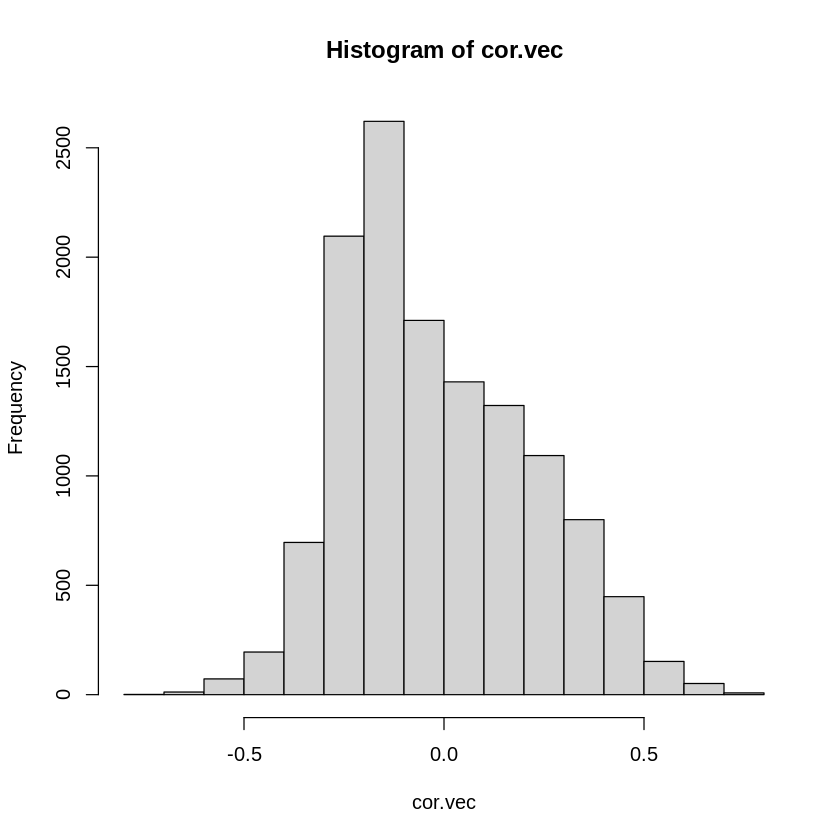

In [3]:
rm.fold <- fold2.ind
my.data <- cbind(data.1[,-rm.fold],data.1[,rm.fold])
dim(my.data)
my.info <- rbind(info.1[-rm.fold,],info.1[rm.fold,])
dim(my.info)

aml.prognosis <- rep(0, length(my.info$Disease))
aml.prognosis[which (my.info$Disease == "AML")] <- 1
sum(aml.prognosis)
length(aml.prognosis)

### Feature Selection with Correlation, Fold 2

cor.vec <- apply (my.data[,1:2000], 1, function (x){cor(x, aml.prognosis[1:2000])})
hist (cor.vec)

gene.ind <- c(which(cor.vec > 0.3), which(cor.vec < -0.3))
length (gene.ind) # just to see how many genes get selected

quantile (cor.vec, probs=c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 1))

#from nki_02_25
sum (cor.vec > 0.3)
sum (cor.vec < -0.3)
gene.ind <- c(which(cor.vec > 0.3), which(cor.vec < -0.3))
length (gene.ind)

### Feature Selection with T-test, Fold 2

zero.ind <- which(aml.prognosis[1:2000] == 0)
one.ind <- which(aml.prognosis[1:2000] == 1)
ttest.vec <- apply (my.data, 1, function (x){(t.test(x[one.ind] , x[zero.ind]))$p.value})

sum (ttest.vec < 0.05)
sum (ttest.vec < 0.01)
sum (ttest.vec < 0.0001)
adj.ttest.vec <- p.adjust (ttest.vec, method="bonferroni")
sum (adj.ttest.vec < 0.05)
sum (adj.ttest.vec < 0.01)
sum (adj.ttest.vec < 0.0001)

ret.order <- order (ttest.vec)
#100 genes with lowest pvalues
gene.ind2.fold2 <- ret.order[1:100]


### Fold 3

[1] 12708  2500

[1] 2500    8

[1] 986

[1] 2500

[1] 2634

0%         10%         25%         50%         75%         90% 
-0.77570832 -0.29043069 -0.20805175 -0.06597047  0.15470334  0.32481922 
       100% 
 0.73726353

[1] 1510

[1] 1124

[1] 2634

[1] 11435

[1] 10993

[1] 10126

[1] 9656

[1] 9428

[1] 8765

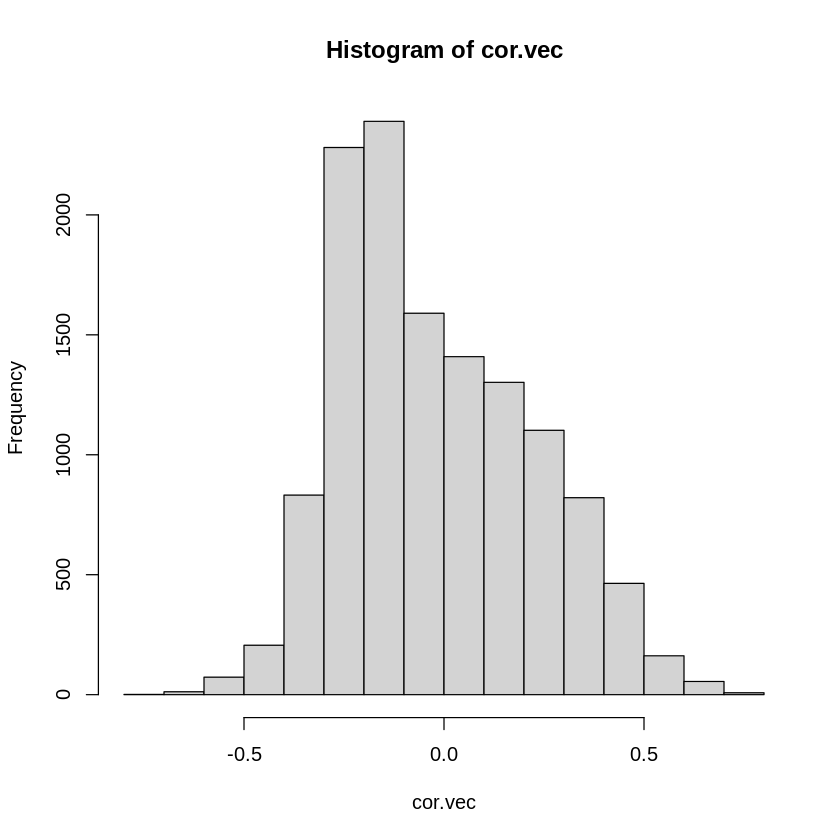

In [4]:
rm.fold <- fold3.ind
my.data <- cbind(data.1[,-rm.fold],data.1[,rm.fold])
dim(my.data)
my.info <- rbind(info.1[-rm.fold,],info.1[rm.fold,])
dim(my.info)

aml.prognosis <- rep(0, length(my.info$Disease))
aml.prognosis[which (my.info$Disease == "AML")] <- 1
sum(aml.prognosis)
length(aml.prognosis)

### Feature Selection with Correlation, Fold 3

cor.vec <- apply (my.data[,1:2000], 1, function (x){cor(x, aml.prognosis[1:2000])})
hist (cor.vec)

gene.ind <- c(which(cor.vec > 0.3), which(cor.vec < -0.3))
length (gene.ind) # just to see how many genes get selected

quantile (cor.vec, probs=c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 1))

#from nki_02_25
sum (cor.vec > 0.3)
sum (cor.vec < -0.3)
gene.ind <- c(which(cor.vec > 0.3), which(cor.vec < -0.3))
length (gene.ind)

### Feature Selection with T-test, Fold 3

zero.ind <- which(aml.prognosis[1:2000] == 0)
one.ind <- which(aml.prognosis[1:2000] == 1)
ttest.vec <- apply (my.data, 1, function (x){(t.test(x[one.ind] , x[zero.ind]))$p.value})

sum (ttest.vec < 0.05)
sum (ttest.vec < 0.01)
sum (ttest.vec < 0.0001)
adj.ttest.vec <- p.adjust (ttest.vec, method="bonferroni")
sum (adj.ttest.vec < 0.05)
sum (adj.ttest.vec < 0.01)
sum (adj.ttest.vec < 0.0001)

ret.order <- order (ttest.vec)
#100 genes with lowest pvalues
gene.ind2.fold3 <- ret.order[1:100]


### Fold 4

[1] 12708  2500

[1] 2500    8

[1] 986

[1] 2500

[1] 2508

0%         10%         25%         50%         75%         90% 
-0.77385609 -0.28436221 -0.20196655 -0.06343064  0.15053424  0.32044248 
       100% 
 0.73542371

[1] 1464

[1] 1044

[1] 2508

[1] 11396

[1] 10977

[1] 10063

[1] 9546

[1] 9300

[1] 8656

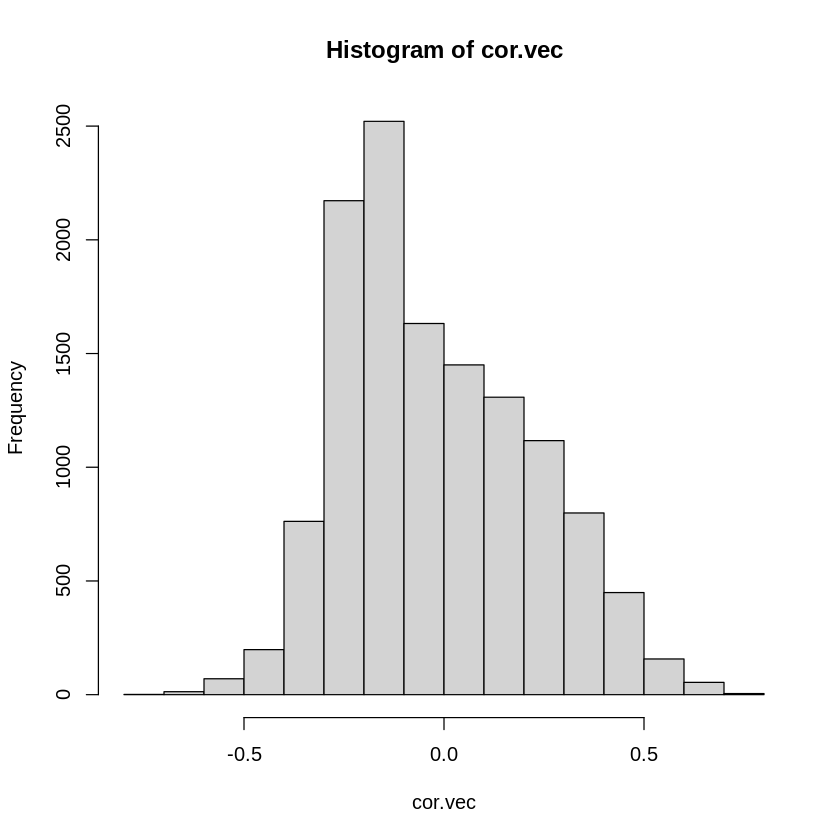

In [5]:
rm.fold <- fold4.ind
my.data <- cbind(data.1[,-rm.fold],data.1[,rm.fold])
dim(my.data)
my.info <- rbind(info.1[-rm.fold,],info.1[rm.fold,])
dim(my.info)

aml.prognosis <- rep(0, length(my.info$Disease))
aml.prognosis[which (my.info$Disease == "AML")] <- 1
sum(aml.prognosis)
length(aml.prognosis)

### Feature Selection with Correlation, Fold 4

cor.vec <- apply (my.data[,1:2000], 1, function (x){cor(x, aml.prognosis[1:2000])})
hist (cor.vec)

gene.ind <- c(which(cor.vec > 0.3), which(cor.vec < -0.3))
length (gene.ind) # just to see how many genes get selected

quantile (cor.vec, probs=c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 1))

#from nki_02_25
sum (cor.vec > 0.3)
sum (cor.vec < -0.3)
gene.ind <- c(which(cor.vec > 0.3), which(cor.vec < -0.3))
length (gene.ind)

### Feature Selection with T-test, Fold 4

zero.ind <- which(aml.prognosis[1:2000] == 0)
one.ind <- which(aml.prognosis[1:2000] == 1)
ttest.vec <- apply (my.data, 1, function (x){(t.test(x[one.ind] , x[zero.ind]))$p.value})

sum (ttest.vec < 0.05)
sum (ttest.vec < 0.01)
sum (ttest.vec < 0.0001)
adj.ttest.vec <- p.adjust (ttest.vec, method="bonferroni")
sum (adj.ttest.vec < 0.05)
sum (adj.ttest.vec < 0.01)
sum (adj.ttest.vec < 0.0001)

ret.order <- order (ttest.vec)
#100 genes with lowest pvalues
gene.ind2.fold4 <- ret.order[1:100]


### Fold 5

[1] 12708  2500

[1] 2500    8

[1] 986

[1] 2500

[1] 2435

0%         10%         25%         50%         75%         90% 
-0.77707787 -0.27983655 -0.19608217 -0.06436764  0.15032402  0.31965093 
       100% 
 0.73764884

[1] 1459

[1] 976

[1] 2435

[1] 11385

[1] 10950

[1] 10021

[1] 9527

[1] 9280

[1] 8586

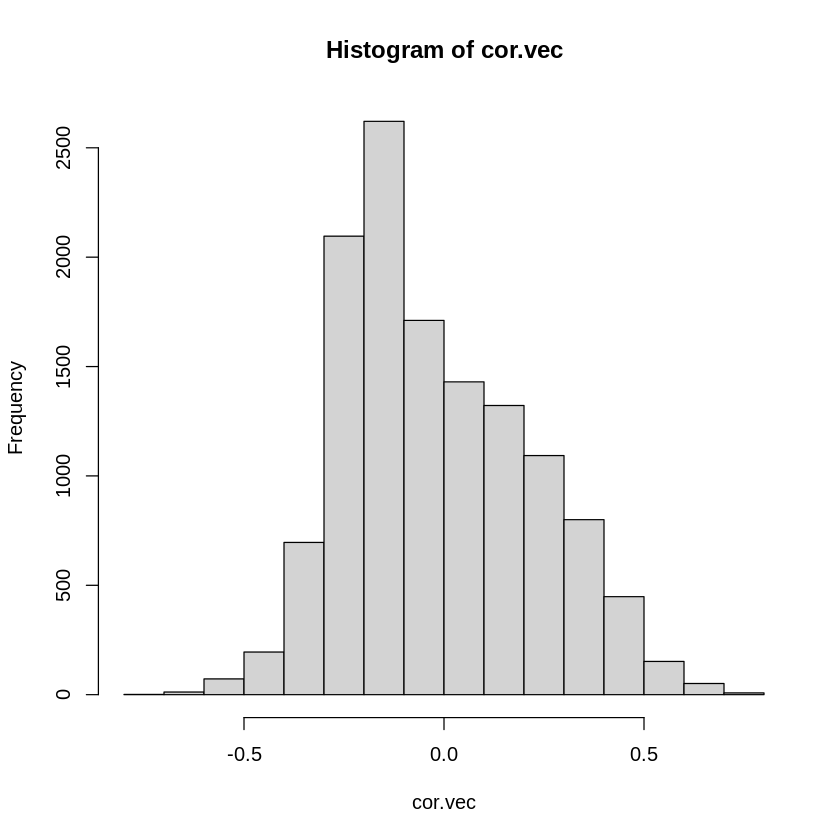

In [6]:
rm.fold <- fold2.ind
my.data <- cbind(data.1[,-rm.fold],data.1[,rm.fold])
dim(my.data)
my.info <- rbind(info.1[-rm.fold,],info.1[rm.fold,])
dim(my.info)

aml.prognosis <- rep(0, length(my.info$Disease))
aml.prognosis[which (my.info$Disease == "AML")] <- 1
sum(aml.prognosis)
length(aml.prognosis)

### Feature Selection with Correlation, Fold 5

cor.vec <- apply (my.data[,1:2000], 1, function (x){cor(x, aml.prognosis[1:2000])})
hist (cor.vec)

gene.ind <- c(which(cor.vec > 0.3), which(cor.vec < -0.3))
length (gene.ind) # just to see how many genes get selected

quantile (cor.vec, probs=c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 1))

#from nki_02_25
sum (cor.vec > 0.3)
sum (cor.vec < -0.3)
gene.ind <- c(which(cor.vec > 0.3), which(cor.vec < -0.3))
length (gene.ind)

### Feature Selection with T-test, Fold 5

zero.ind <- which(aml.prognosis[1:2000] == 0)
one.ind <- which(aml.prognosis[1:2000] == 1)
ttest.vec <- apply (my.data, 1, function (x){(t.test(x[one.ind] , x[zero.ind]))$p.value})

sum (ttest.vec < 0.05)
sum (ttest.vec < 0.01)
sum (ttest.vec < 0.0001)
adj.ttest.vec <- p.adjust (ttest.vec, method="bonferroni")
sum (adj.ttest.vec < 0.05)
sum (adj.ttest.vec < 0.01)
sum (adj.ttest.vec < 0.0001)

ret.order <- order (ttest.vec)
#100 genes with lowest pvalues
gene.ind2.fold5 <- ret.order[1:100]


********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

Project - SVM - Started - Here

********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [7]:
# Linear SVM Fold 1 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold1[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold1.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "linear")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of linear SVM model with selected genes:", round(accuracy, 4))


Accuracy of linear SVM model with selected genes: 0.9488

In [8]:
# Linear SVM Fold 2 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold2[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold2.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "linear")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of linear SVM model with selected genes:", round(accuracy, 4))


Accuracy of linear SVM model with selected genes: 0.9372

In [9]:
# Linear SVM Fold 3 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold3[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold3.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "linear")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of linear SVM model with selected genes:", round(accuracy, 4))


Accuracy of linear SVM model with selected genes: 0.9474

In [10]:
# Linear SVM Fold 4 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold4[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold4.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "linear")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of linear SVM model with selected genes:", round(accuracy, 4))


Accuracy of linear SVM model with selected genes: 0.947

In [11]:
# Linear SVM Fold 5 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold5[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold5.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "linear")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of linear SVM model with selected genes:", round(accuracy, 4))


Accuracy of linear SVM model with selected genes: 0.946

In [28]:
Linear.SVM.model <- (0.9488+0.9372+0.9474+0.947+0.946)/5
cat("Linear.SVM.model:" , Linear.SVM.model)

Linear.SVM.model: 0.94528

In [12]:
# Radial SVM Fold 1 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold1[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold1.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "radial")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of radial SVM model with selected genes:", round(accuracy, 4))


Accuracy of radial SVM model with selected genes: 0.9619

In [13]:
# Radial SVM Fold 2 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold2[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold2.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "radial")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of radial SVM model with selected genes:", round(accuracy, 4))


Accuracy of radial SVM model with selected genes: 0.9586

In [14]:
# Radial SVM Fold 3 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold3[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold3.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "radial")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of radial SVM model with selected genes:", round(accuracy, 4))


Accuracy of radial SVM model with selected genes: 0.9619

In [15]:
# Radial SVM Fold 4 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold4[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold4.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "radial")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of radial SVM model with selected genes:", round(accuracy, 4))


Accuracy of radial SVM model with selected genes: 0.9474

In [16]:
# Radial SVM Fold 5 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold5[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold5.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "radial")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of radial SVM model with selected genes:", round(accuracy, 4))


Accuracy of radial SVM model with selected genes: 0.9558

In [29]:
Radial.SVM.model <- (0.9619+0.9586+0.9619+0.9474+0.9558)/5
cat("Radial.SVM.model:" , Radial.SVM.model)

Radial.SVM.model: 0.95712

In [17]:
# Polynomial SVM Fold 1 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold1[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold1.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "polynomial")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of polynomial SVM model with selected genes:", round(accuracy, 4))


Accuracy of polynomial SVM model with selected genes: 0.9395

In [18]:
# Polynomial SVM Fold 2 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold2[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold2.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "polynomial")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of polynomial SVM model with selected genes:", round(accuracy, 4))


Accuracy of polynomial SVM model with selected genes: 0.9102

In [19]:
# Polynomial SVM Fold 3 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold3[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold3.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "polynomial")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of polynomial SVM model with selected genes:", round(accuracy, 4))


Accuracy of polynomial SVM model with selected genes: 0.9447

In [20]:
# Polynomial SVM Fold 4 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold4[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold4.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "polynomial")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of polynomial SVM model with selected genes:", round(accuracy, 4))


Accuracy of polynomial SVM model with selected genes: 0.9037

In [21]:
# Polynomial SVM Fold 5 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold5[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold5.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "polynomial")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of polynomial SVM model with selected genes:", round(accuracy, 4))


Accuracy of polynomial SVM model with selected genes: 0.9358

In [30]:
Polynomial.SVM.model <- (0.9395+0.9102+0.9447+0.9037+0.9358)/5
cat("Polynomial.SVM.model:" , Polynomial.SVM.model)

Polynomial.SVM.model: 0.92678

In [22]:
# Sigmoid SVM Fold 1 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold1[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold1.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "sigmoid")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of sigmoid SVM model with selected genes:", round(accuracy, 4))


Accuracy of sigmoid SVM model with selected genes: 0.9437

In [23]:
# Sigmoid SVM Fold 2 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold2[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold2.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "sigmoid")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of sigmoid SVM model with selected genes:", round(accuracy, 4))


Accuracy of sigmoid SVM model with selected genes: 0.9428

In [24]:
# Sigmoid SVM Fold 3 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold3[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold3.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "sigmoid")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of sigmoid SVM model with selected genes:", round(accuracy, 4))


Accuracy of sigmoid SVM model with selected genes: 0.9423

In [25]:
# Sigmoid SVM Fold 4 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold4[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold4.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "sigmoid")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of sigmoid SVM model with selected genes:", round(accuracy, 4))


Accuracy of sigmoid SVM model with selected genes: 0.9428

In [26]:
# Sigmoid SVM Fold 5 Disease with top 100 genes selected

# Assume gene.ind2.fold1 contains the indices of the top 100 genes selected
selected_genes <- gene.ind2.fold5[1:100]

# Subset the data to include only selected genes
data_t <- t(data.1)  
data_selected <- data_t[, selected_genes]
labels_selected <- as.factor(ifelse(info.1$Disease == "AML", "AML", "NON-AML"))

# Split the data into training and test sets
set.seed(123)
train.idx <- fold5.ind[1:350]
data.train <- data_selected[train.idx, ]
labels.train <- labels_selected[train.idx]
data.test <- data_selected[-train.idx, ]
labels.test <- labels_selected[-train.idx]

# Train the SVM model using the selected genes
svm_model <- svm(labels.train ~ ., data = data.train, kernel = "sigmoid")

# Make predictions on the test set
predictions <- predict(svm_model, data.test)

# Calculate accuracy of the model
accuracy <- sum(predictions == labels.test) / length(predictions)
cat("Accuracy of sigmoid SVM model with selected genes:", round(accuracy, 4))


Accuracy of sigmoid SVM model with selected genes: 0.9423

In [31]:
Sigmoid.SVM.model <- (0.9437+0.9428+0.9423+0.9428+0.9423)/5
cat("Sigmoid.SVM.model:" , Sigmoid.SVM.model)

Sigmoid.SVM.model: 0.94278

********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

Project - SVM - Ends - Here

********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************